In [1]:
import torch
from IPython.display import Image
import shutil
import os
from random import choice

In [2]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 14555, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 14555 (delta 38), reused 46 (delta 25), pack-reused 14478
Receiving objects: 100% (14555/14555), 13.72 MiB | 26.01 MiB/s, done.
Resolving deltas: 100% (10020/10020), done.


In [3]:
%cd yolov5/

/kaggle/working/yolov5


In [4]:
!pip install -r requirements.txt

In [5]:
# arrays to store file names
imgs = []
xmls = []

# setup directory names
train_path = "/kaggle/working/dataset/images/train"
val_path = "/kaggle/working/dataset/images/val"
crs_path = "/kaggle/input/traffic-signs-dataset-in-yolo-format/ts/ts"

train_ratio = 0.90
val_ratio = 0.10

# total count of imgs
total_img_count = len(os.listdir(crs_path))/2

# sorting count of imgs
for (dirname,dirs, files) in os.walk(crs_path):
#     print(files)
    for filename in files:
#         print("hello")
        if filename.endswith(".txt"):
            xmls.append(filename)
        else:
            imgs.append(filename)

# counting range for cycles
count_for_train = int(len(imgs)*train_ratio)
count_for_val = int(len(imgs)*val_ratio)
print("training images are : ",count_for_train)
print("validation images are : ",count_for_val)

training images are :  666
validation images are :  74


In [6]:
len(imgs)

741

In [7]:
train_image_path = "/kaggle/working/dataset/images/train"
train_label_path = "/kaggle/working/dataset/labels/train"
val_image_path = "/kaggle/working/dataset/images/val"
val_label_path = "/kaggle/working/dataset/labels/val"

if not os.path.isdir(train_image_path):
    os.makedirs(train_image_path)
if not os.path.isdir(train_label_path):
    os.makedirs(train_label_path)
if not os.path.isdir(val_image_path):
    os.makedirs(val_image_path)
if not os.path.isdir(val_label_path):
    os.makedirs(val_label_path)

# cycle for train dir
for x in range(count_for_train):
    file_jpg = choice(imgs)
    file_xml = file_jpg[:-4] + ".txt"
    
    shutil.copy(os.path.join(crs_path,file_jpg),os.path.join(train_image_path,file_jpg))
    shutil.copy(os.path.join(crs_path,file_xml),os.path.join(train_label_path,file_xml))
    
    imgs.remove(file_jpg)
    xmls.remove(file_xml)
    
# cycle for test dir
for x in range(count_for_val):
    file_jpg = choice(imgs)
    file_xml = file_jpg[:-4] + ".txt"
    
    shutil.copy(os.path.join(crs_path,file_jpg),os.path.join(val_image_path,file_jpg))
    shutil.copy(os.path.join(crs_path,file_xml),os.path.join(val_label_path,file_xml))
    
    imgs.remove(file_jpg)
    xmls.remove(file_xml)

# rest of files
print("images length - ",len(imgs))
print(imgs,xmls)
for x in imgs:
    file_jpg = x
    file_xml = file_jpg[:-4] + ".txt"
    
    shutil.copy(os.path.join(crs_path,file_jpg),os.path.join(val_image_path,file_jpg))
    shutil.copy(os.path.join(crs_path,file_xml),os.path.join(val_label_path,file_xml))
# shutil.copytree(crs_path,val_path)

images length -  1
['00304.jpg'] ['00304.txt']


In [8]:
!pip install googledrivedownloader

In [9]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1KtlDXpLCfqoklUTdrnVASNbxL_AK9qnx',
                                    dest_path='/kaggle/working/dataset/dataset.yaml')

In [10]:
with open(r'/kaggle/working/dataset/dataset.yaml', 'r') as file:
    lines = file.readlines()
    print(lines)

['train: /kaggle/working/dataset/images/train\n', 'val: /kaggle/working/dataset/images/val\n', '\n', 'nc: 4\n', "names: ['speed limit','yield','mandatory','other']"]


In [11]:
!wandb disabled
!python train.py --img 415 --batch 32 --epochs 50 --data /kaggle/working/dataset/dataset.yaml --weights yolov5s.pt --cache --workers 2

W&B disabled.
train: weights=yolov5s.pt, cfg=, data=/kaggle/working/dataset/dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=32, imgsz=415, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-34-g1ae9194 Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_

In [12]:
test_model = torch.hub.load('ultralytics/yolov5', 'custom','runs/train/exp/weights/best.pt')

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-12-17 Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [13]:
import cv2 as cv

img = cv.imread("/kaggle/input/kitti-3d-object-detection-dataset/testing/image_2/000926.png")
print(img.shape)
results = test_model(img)

(370, 1224, 3)


In [14]:
results.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,381.018005,115.223228,413.459991,149.231857,0.904453,0,speed limit


In [27]:
crops = results.crop(save=False)
result_img = crops[0]['im']
print(result_img.shape)
cv.imshow("Result",result_img)

(45, 43, 3)


error: OpenCV(4.5.4) /tmp/pip-req-build-jpmv6t9_/opencv/modules/highgui/src/window.cpp:1274: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


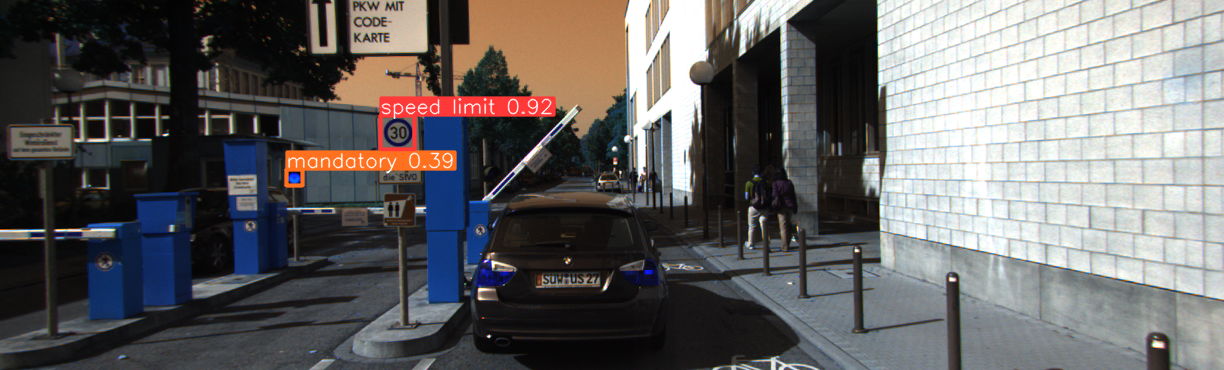

AttributeError: 'NoneType' object has no attribute 'shape'

In [32]:
import cv2 as cv

s = results.show()
print(s.shape)
cv.imshow(s)

In [28]:
img2 = cv.imread("/kaggle/input/kitti-3d-object-detection-dataset/testing/image_2/000174.png")
print(img2.shape)
results2 = test_model(img2)
results2.pandas().xyxy[0]

(375, 1242, 3)


,xmin,ymin,xmax,ymax,confidence,class,name
0,348.335022,180.088181,415.140839,254.982956,0.818482,3,other
1,450.161163,187.427444,488.046051,226.885956,0.500846,3,other


In [49]:
def extract_classes(result):
    results_dataframe = result.pandas().xyxy[0]
    
    classes = set()
    for i in range(len(results_dataframe)):
        detected_sign = results_dataframe.iloc[i]
        
        if detected_sign['confidence'] >= 0.6:
            classes.add(detected_sign['name'])
        
    return classes

In [50]:
extract_classes(results)

{'speed limit'}

/kaggle/working/yolov5


In [60]:
import os

parent_dir = "/kaggle/input/kitti-images/Images"
image_list = os.listdir(parent_dir)
image_list.sort()

img_dict = dict()

for image_name in image_list:
    image_dir = os.path.join(parent_dir,image_name)
    img = cv.imread(image_dir)
    
    result = test_model(img)
    classes = extract_classes(result)
    
    img_dict[image_name] = classes
    print(image_name,classes)

frame000000.png set()
frame000001.png set()
frame000002.png set()
frame000003.png set()
frame000004.png set()
frame000005.png set()
frame000006.png set()
frame000007.png set()
frame000008.png set()
frame000009.png set()
frame000010.png set()
frame000011.png set()
frame000012.png set()
frame000013.png set()
frame000014.png set()
frame000015.png set()
frame000016.png set()
frame000017.png set()
frame000018.png set()
frame000019.png set()
frame000020.png set()
frame000021.png set()
frame000022.png set()
frame000023.png set()
frame000024.png set()
frame000025.png set()
frame000026.png set()
frame000027.png set()
frame000028.png set()
frame000029.png set()
frame000030.png set()
frame000031.png set()
frame000032.png set()
frame000033.png set()
frame000034.png set()
frame000035.png set()
frame000036.png set()
frame000037.png set()
frame000038.png set()
frame000039.png set()
frame000040.png set()
frame000041.png set()
frame000042.png set()
frame000043.png set()
frame000044.png set()
frame00004

In [62]:
import pickle

with open('/kaggle/working/image_dict.pickle', 'wb') as handle:
    pickle.dump(image_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)